In [4]:
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 04:27:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-08 04:27:14 (18.3 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [6]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


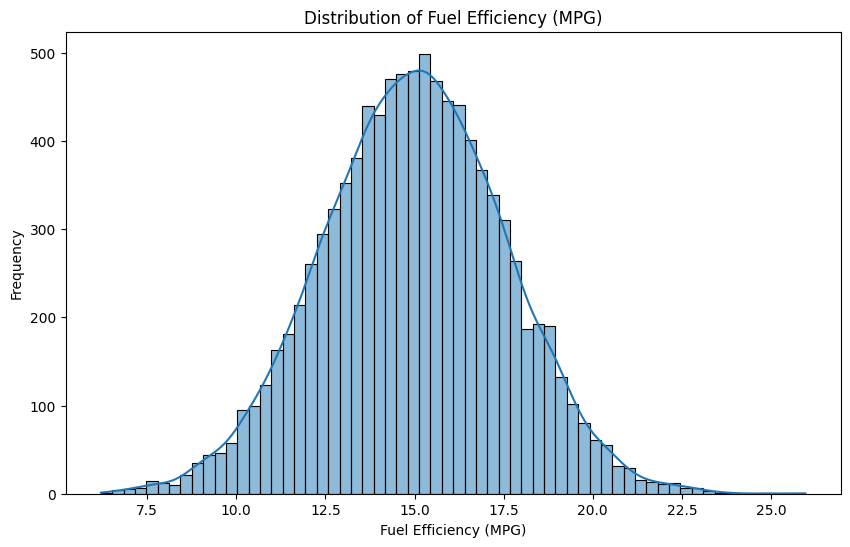

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['fuel_efficiency_mpg'], kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Q1
print(df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [10]:
#Q2
median_horsepower = df['horsepower'].median()
print(f"The median horsepower is: {median_horsepower}")

The median horsepower is: 149.0


In [11]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(f"Size of full training set: {len(df_full_train)}")
print(f"Size of training set: {len(df_train)}")
print(f"Size of validation set: {len(df_val)}")
print(f"Size of test set: {len(df_test)}")

Size of full training set: 7763
Size of training set: 5822
Size of validation set: 1941
Size of test set: 1941


In [12]:
X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
y_train = df_train['fuel_efficiency_mpg']

X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
y_val = df_val['fuel_efficiency_mpg']

X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
y_test = df_test['fuel_efficiency_mpg']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5822, 4)
Shape of y_train: (5822,)
Shape of X_val: (1941, 4)
Shape of y_val: (1941,)
Shape of X_test: (1941, 4)
Shape of y_test: (1941,)


In [13]:
#Q3
X_train['horsepower'].fillna(0, inplace=True)
X_val['horsepower'].fillna(0, inplace=True)

/tmp/ipython-input-2416975093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['horsepower'].fillna(0, inplace=True)
/tmp/ipython-input-2416975093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [15]:
from sklearn.linear_model import LinearRegression

model_zero = LinearRegression()
model_zero.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_zero = model_zero.predict(X_val)
mse_zero = mean_squared_error(y_val, y_pred_zero)
rmse_zero = np.sqrt(mse_zero)

print(f"RMSE on validation data (filled with 0): {rmse_zero:.2f}")

RMSE on validation data (filled with 0): 0.51


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model_zero = LinearRegression()
model_zero.fit(X_train, y_train)

y_pred_zero = model_zero.predict(X_val)
mse_zero = mean_squared_error(y_val, y_pred_zero)
rmse_zero = np.sqrt(mse_zero)

print(f"RMSE on validation data (filled with 0): {rmse_zero:.2f}")

RMSE on validation data (filled with 0): 0.51


In [18]:
train_mean_horsepower = df_train['horsepower'].mean()
X_train['horsepower'].fillna(train_mean_horsepower, inplace=True)
X_val['horsepower'].fillna(train_mean_horsepower, inplace=True)

print(f"Mean horsepower from training data: {train_mean_horsepower:.2f}")
print(f"Missing values in X_train['horsepower'] after filling: {X_train['horsepower'].isnull().sum()}")
print(f"Missing values in X_val['horsepower'] after filling: {X_val['horsepower'].isnull().sum()}")

Mean horsepower from training data: 149.80
Missing values in X_train['horsepower'] after filling: 0
Missing values in X_val['horsepower'] after filling: 0


/tmp/ipython-input-680447836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['horsepower'].fillna(train_mean_horsepower, inplace=True)
/tmp/ipython-input-680447836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [19]:
from sklearn.linear_model import LinearRegression

model_mean = LinearRegression()
model_mean.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_mean = model_mean.predict(X_val)
mse_mean = mean_squared_error(y_val, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)

print(f"RMSE on validation data (filled with mean): {rmse_mean:.2f}")

RMSE on validation data (filled with mean): 0.51


In [21]:
print(f"RMSE with 0 imputation: {rmse_zero:.2f}")
print(f"RMSE with mean imputation: {rmse_mean:.2f}")

if rmse_zero < rmse_mean:
    print("Filling missing values with 0 resulted in a better (lower) RMSE.")
elif rmse_mean < rmse_zero:
    print("Filling missing values with the mean resulted in a better (lower) RMSE.")
else:
    print("Both imputation methods resulted in the same RMSE.")

RMSE with 0 imputation: 0.51
RMSE with mean imputation: 0.51
Both imputation methods resulted in the same RMSE.


In [22]:
X_train['horsepower'] = X_train['horsepower'].fillna(0)
X_val['horsepower'] = X_val['horsepower'].fillna(0)

In [23]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
print(r_values)

[0, 0.01, 0.1, 1, 5, 10, 100]


In [24]:
for r in r_values:
    print(f"Current regularization parameter (r): {r}")

Current regularization parameter (r): 0
Current regularization parameter (r): 0.01
Current regularization parameter (r): 0.1
Current regularization parameter (r): 1
Current regularization parameter (r): 5
Current regularization parameter (r): 10
Current regularization parameter (r): 100


In [25]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=r)
model_ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_ridge = model_ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"RMSE on validation data (Ridge with r={r}): {rmse_ridge:.2f}")

RMSE on validation data (Ridge with r=100): 0.51


In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    print(f"Current regularization parameter (r): {r}")
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train, y_train)

    y_pred_ridge = model_ridge.predict(X_val)
    mse_ridge = mean_squared_error(y_val, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    rmse_scores[r] = round(rmse_ridge, 2)

    print(f"RMSE on validation data (Ridge with r={r}): {rmse_scores[r]:.2f}")

print("\nRMSE scores for different regularization parameters:")
for r, rmse in rmse_scores.items():
    print(f"r={r}: {rmse:.2f}")

Current regularization parameter (r): 0
RMSE on validation data (Ridge with r=0): 0.51
Current regularization parameter (r): 0.01
RMSE on validation data (Ridge with r=0.01): 0.51
Current regularization parameter (r): 0.1
RMSE on validation data (Ridge with r=0.1): 0.51
Current regularization parameter (r): 1
RMSE on validation data (Ridge with r=1): 0.51
Current regularization parameter (r): 5
RMSE on validation data (Ridge with r=5): 0.51
Current regularization parameter (r): 10
RMSE on validation data (Ridge with r=10): 0.51
Current regularization parameter (r): 100
RMSE on validation data (Ridge with r=100): 0.51

RMSE scores for different regularization parameters:
r=0: 0.51
r=0.01: 0.51
r=0.1: 0.51
r=1: 0.51
r=5: 0.51
r=10: 0.51
r=100: 0.51


In [28]:
min_rmse = min(rmse_scores.values())
best_r_values = [r for r, rmse in rmse_scores.items() if rmse == min_rmse]

print(f"\nThe minimum RMSE achieved is: {min_rmse:.2f}")
print(f"The 'r' values that resulted in the minimum RMSE are: {best_r_values}")


The minimum RMSE achieved is: 0.51
The 'r' values that resulted in the minimum RMSE are: [0, 0.01, 0.1, 1, 5, 10, 100]


In [29]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(seed_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [30]:
rmse_scores = []

In [31]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    print(f"Processing seed: {seed}")

Processing seed: 0
Processing seed: 1
Processing seed: 2
Processing seed: 3
Processing seed: 4
Processing seed: 5
Processing seed: 6
Processing seed: 7
Processing seed: 8
Processing seed: 9


In [32]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
y_train = df_train['fuel_efficiency_mpg']

X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
y_val = df_val['fuel_efficiency_mpg']

X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
y_test = df_test['fuel_efficiency_mpg']

X_train['horsepower'] = X_train['horsepower'].fillna(0)
X_val['horsepower'] = X_val['horsepower'].fillna(0)

print(f"Data split and missing values filled for seed {seed}")

Data split and missing values filled for seed 9


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
rmse_scores.append(rmse)

print(f"RMSE for seed {seed}: {rmse:.3f}")

RMSE for seed 9: 0.507


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:
    print(f"Processing seed: {seed}")

    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    y_train = df_train['fuel_efficiency_mpg']

    X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    y_val = df_val['fuel_efficiency_mpg']

    X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
    y_test = df_test['fuel_efficiency_mpg']

    X_train['horsepower'] = X_train['horsepower'].fillna(0)
    X_val['horsepower'] = X_val['horsepower'].fillna(0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    print(f"RMSE for seed {seed}: {rmse:.3f}")

print("\nRMSE scores for each seed:", [round(score, 3) for score in rmse_scores])

Processing seed: 0
RMSE for seed 0: 0.528
Processing seed: 1
RMSE for seed 1: 0.522
Processing seed: 2
RMSE for seed 2: 0.516
Processing seed: 3
RMSE for seed 3: 0.512
Processing seed: 4
RMSE for seed 4: 0.520
Processing seed: 5
RMSE for seed 5: 0.526
Processing seed: 6
RMSE for seed 6: 0.507
Processing seed: 7
RMSE for seed 7: 0.522
Processing seed: 8
RMSE for seed 8: 0.516
Processing seed: 9
RMSE for seed 9: 0.507

RMSE scores for each seed: [np.float64(0.528), np.float64(0.522), np.float64(0.516), np.float64(0.512), np.float64(0.52), np.float64(0.526), np.float64(0.507), np.float64(0.522), np.float64(0.516), np.float64(0.507)]


In [35]:
std_rmse = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {std_rmse:.3f}")

Standard deviation of RMSE scores: 0.007


In [36]:
std_rmse = np.std(rmse_scores)

In [37]:
print(f"Standard deviation of RMSE scores: {std_rmse:.3f}")

Standard deviation of RMSE scores: 0.007


In [38]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

print(f"Size of training set: {len(df_train)}")
print(f"Size of validation set: {len(df_val)}")
print(f"Size of test set: {len(df_test)}")

Size of training set: 5822
Size of validation set: 1941
Size of test set: 1941


In [39]:
df_train_full = pd.concat([df_train, df_val], axis=0)
print(f"Shape of df_train_full: {df_train_full.shape}")

Shape of df_train_full: (7763, 5)


In [40]:
X_train_full = df_train_full.drop('fuel_efficiency_mpg', axis=1)
y_train_full = df_train_full['fuel_efficiency_mpg']

X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
y_test = df_test['fuel_efficiency_mpg']

print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train_full:", y_train_full.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_full: (7763, 4)
Shape of y_train_full: (7763,)
Shape of X_test: (1941, 4)
Shape of y_test: (1941,)


In [41]:
X_train_full['horsepower'] = X_train_full['horsepower'].fillna(0)
X_test['horsepower'] = X_test['horsepower'].fillna(0)

print("Missing values in X_train_full['horsepower'] after filling:", X_train_full['horsepower'].isnull().sum())
print("Missing values in X_test['horsepower'] after filling:", X_test['horsepower'].isnull().sum())

Missing values in X_train_full['horsepower'] after filling: 0
Missing values in X_test['horsepower'] after filling: 0


In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

model_final = Ridge(alpha=0.001)
model_final.fit(X_train_full, y_train_full)

y_pred_test = model_final.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"RMSE on the test set (Ridge with r=0.001 and NA filled with 0): {rmse_test:.3f}")

RMSE on the test set (Ridge with r=0.001 and NA filled with 0): 0.521
